In [43]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import datasets

In [63]:
bike_rentals = pd.read_csv('https://raw.githubusercontent.com/datajour-gr/ML-algorithms/master/week%205/day.csv')
bike_rentals.head()
#plt.hist(bike_rentals.cnt,color='g')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
bike_rentals.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month',
                             'weathersit':'weather', 'temp': 'temperature',
                             'atemp': 'feelingTemperature', 'hum':'humidity',
                             'cnt':'totalcount' 
                             }, inplace=True)

bike_rentals.drop(["instant", "date", "year", "registered"],axis=1, inplace=True)

In [65]:
bike_rentals.keys()


Index(['season', 'month', 'holiday', 'weekday', 'workingday', 'weather',
       'temperature', 'feelingTemperature', 'humidity', 'windspeed', 'casual',
       'totalcount'],
      dtype='object')

In [66]:
bike_rentals.shape

(731, 12)

In [67]:
bike_rentals

,season,month,holiday,weekday,workingday,weather,temperature,feelingTemperature,humidity,windspeed,casual,totalcount
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1796


In [68]:
bike_rentals.describe()

,season,month,holiday,weekday,workingday,weather,temperature,feelingTemperature,humidity,windspeed,casual,totalcount
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,8714.000000


In [69]:
print(bike_rentals.isnull().sum())
missing_values = ["n/a", "na", "--", 999,9999]   
bike_rentals.replace(to_replace = missing_values, value = np.nan, inplace = True)
bike_rentals.dropna(inplace=True) 


season                0
month                 0
holiday               0
weekday               0
workingday            0
weather               0
temperature           0
feelingTemperature    0
humidity              0
windspeed             0
casual                0
totalcount            0
dtype: int64


In [70]:
bike_rentals.describe()

,season,month,holiday,weekday,workingday,weather,temperature,feelingTemperature,humidity,windspeed,casual,totalcount
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,8714.000000


Text(0.5, 1.0, 'Relationship between Bike_rental and Temperature')

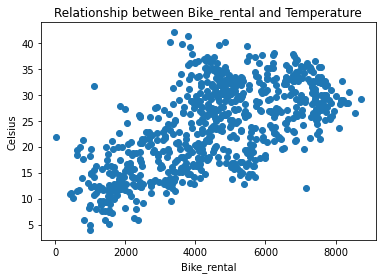

In [71]:
# README: atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
bike_rentals.feelingTemperature = bike_rentals.feelingTemperature.apply(lambda x: x*50)

plt.scatter(bike_rentals.totalcount, bike_rentals.feelingTemperature)
plt.xlabel("Bike_rental")
plt.ylabel("Celsius")
plt.title("Relationship between Bike_rental and Temperature")

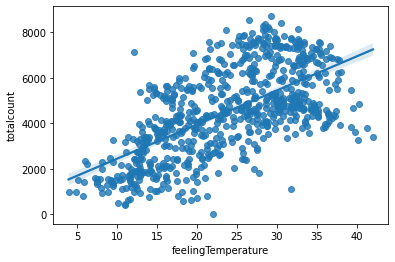

In [72]:
sns.regplot(y='totalcount', x='feelingTemperature', data=bike_rentals, fit_reg = True)

In [73]:
x_try = np.array(bike_rentals.feelingTemperature)       
y_try = np.array(bike_rentals.totalcount)   
x_try = x_try.reshape(-1,1)        
y_try = y_try.reshape(-1,1)        
print(x_try.shape)
print(y_try.shape)

(731, 1)
(731, 1)


Text(0.5, 1.0, 'Relationship between Bike_rental and Temperature')

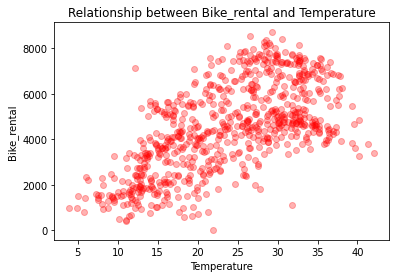

In [74]:
s1 = plt.scatter(x_try, y_try, color='r', marker='o', alpha = 0.3) 
plt.xlabel('Temperature')  
plt.ylabel('Bike_rental')

plt.title('Relationship between Bike_rental and Temperature')

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_try, y_try)
y_pred = lm.predict(x_try)
rmse = np.sqrt(mean_squared_error(y_try, y_pred))
print( rmse)

1501.7236268108838


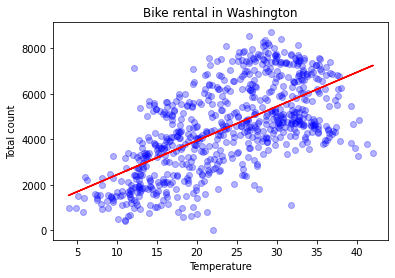

In [76]:
s1 = plt.scatter(x_try, y_try, color='b', marker='o', alpha = 0.3) 
plt.xlabel('Temperature')  
plt.ylabel('Total count') 
plt.title('Bike rental in Washington') 
plt.plot(x_try, y_pred, color='red') 
plt.savefig('Bike_Rental.png', dpi=150, bbox_inches='tight') 
plt.show() 

Η ενοικίαση ποδηλάτων είναι άμεσα συνδεδεμένη με τις καιρικές συνθήκες. Η θερμοκρασία και η αίσθηση αυτής επηρεάζουν τη συμπεριφορά των ανθρώπων όσον αφορά στο δανεισμό ενός ποδήλατου. Από το παραπάνω γράφημα γραμμικής παλινδόμησης, στο οποίο μεταβλητές είναι η ενοικίαση ποδηλάτων και η αίσθηση της θερμοκρασίας του περιβάλλοντος, αποδεικνύεται ότι υψηλότερη ενοικίαση ποδηλάτων παρατηρείται όταν η θερμοκρασία κυμαίνεται από 30 έως 35 βαθμούς Κελσίου. Αντίθετα, σε θερμοκρασίες σχετικά χαμηλές από 0 έως 10 βαθμούς Κελσίου οι άνθρωποι τείνουν να αποφεύγουν το δανεισμό ποδηλάτων.


In [77]:
X_try = bike_rentals.drop('totalcount', axis = 1)
y_try = bike_rentals['totalcount']              
all_reg = LinearRegression()
all_reg.fit(X_try, y_try)     
y_pred = all_reg.predict(X_try) 
rmse = np.sqrt(mean_squared_error(y_try, y_pred)) 
r2 = round(all_reg.score(X_try, y_try), 2)  
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))    

R2 score is 0.74
RMSE is 979.230178507923


ValueError: ignored

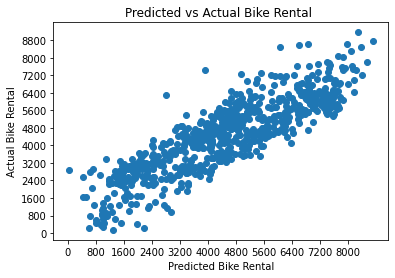

In [78]:
plt.scatter(y_try, y_pred)
plt.xlabel('Predicted Bike Rental')
plt.ylabel('Actual Bike Rental')
plt.title('Predicted vs Actual Bike Rental ')

plt.xticks(np.arange(0, max(y_try), step=800))
plt.yticks(np.arange(0, max(y_pred), step=800))

plt.plot(np.arange(0, max(y_try), step=1), np.arange(0, max(y_pred), step=1), color = 'red')

plt.show()
plt.clf()